# Import Data

In [2]:
import pandas as pd

# import data.xlsx
data_path = "./data.xlsx"
xls = pd.ExcelFile(data_path)

f1m = pd.read_excel(xls, 'Follower_Mk1')
f2m = pd.read_excel(xls, 'Follower_Mk2')
f3m = pd.read_excel(xls, 'Follower_Mk3')

f1m.head()

,Date,Leader's Price,Follower's Price,Cost
0,1,1.721828,1.774033,1
1,2,1.779242,1.793029,1
2,3,1.787140,1.786484,1
3,4,1.773467,1.773290,1
4,5,1.746195,1.810835,1


# Define Given Functions

In [3]:
def demand_L(u_L, u_F):
    return 2 - u_L + (0.3 * u_F)

def daily_profit_L(u_L, u_F, c_L):
    return (u_L - c_L) * demand_L(u_L, u_F)

def demand_F(u_L, u_F):
    return 2 - u_F + (0.3 * u_L)

def daily_profit_F(u_L, u_F, c_F):
    return (u_F - c_F) * demand_L(u_L, u_F)

# Clean Data
Just removing any outliers defined by the 99th quantile.

In [4]:
q_1 = f1m["Follower\'s Price"].quantile(0.99)
f1m = f1m[f1m["Follower\'s Price"] < q_1]
q_2 = f2m["Follower\'s Price"].quantile(0.99)
f2m = f2m[f2m["Follower\'s Price"] < q_2]
q_3 = f3m["Follower\'s Price"].quantile(0.99)
f3m = f3m[f3m["Follower\'s Price"] < q_3]

f1m.head()

,Date,Leader's Price,Follower's Price,Cost
0,1,1.721828,1.774033,1
1,2,1.779242,1.793029,1
2,3,1.787140,1.786484,1
3,4,1.773467,1.773290,1
4,5,1.746195,1.810835,1


In [5]:
its = range(1, 20)
path = f'C:/GitRepos/CGT_CWK/data_output/mk1_it_1.csv'
df = pd.read_csv(path)
df['Date'] = range(1, len(df) + 1)
for i in range(2, 20):
    path = f'C:/GitRepos/CGT_CWK/data_output/mk1_it_{i}.csv'
    partial_df = pd.read_csv(path)
    partial_df['Date'] = range(1, len(partial_df) + 1)
    df = pd.concat([df, partial_df], ignore_index=True)

%pip install plotly
import plotly.express as px

fig = px.scatter_3d(df, x="Leader Price", y="Follower Price", z="Date", width=1000, height=800)
fig.show()
    

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
np.corrcoef(df['Leader Price'], df['Follower Price'])[0, 1]

0.3129455766318772

# Visualisations

## Price Distributions


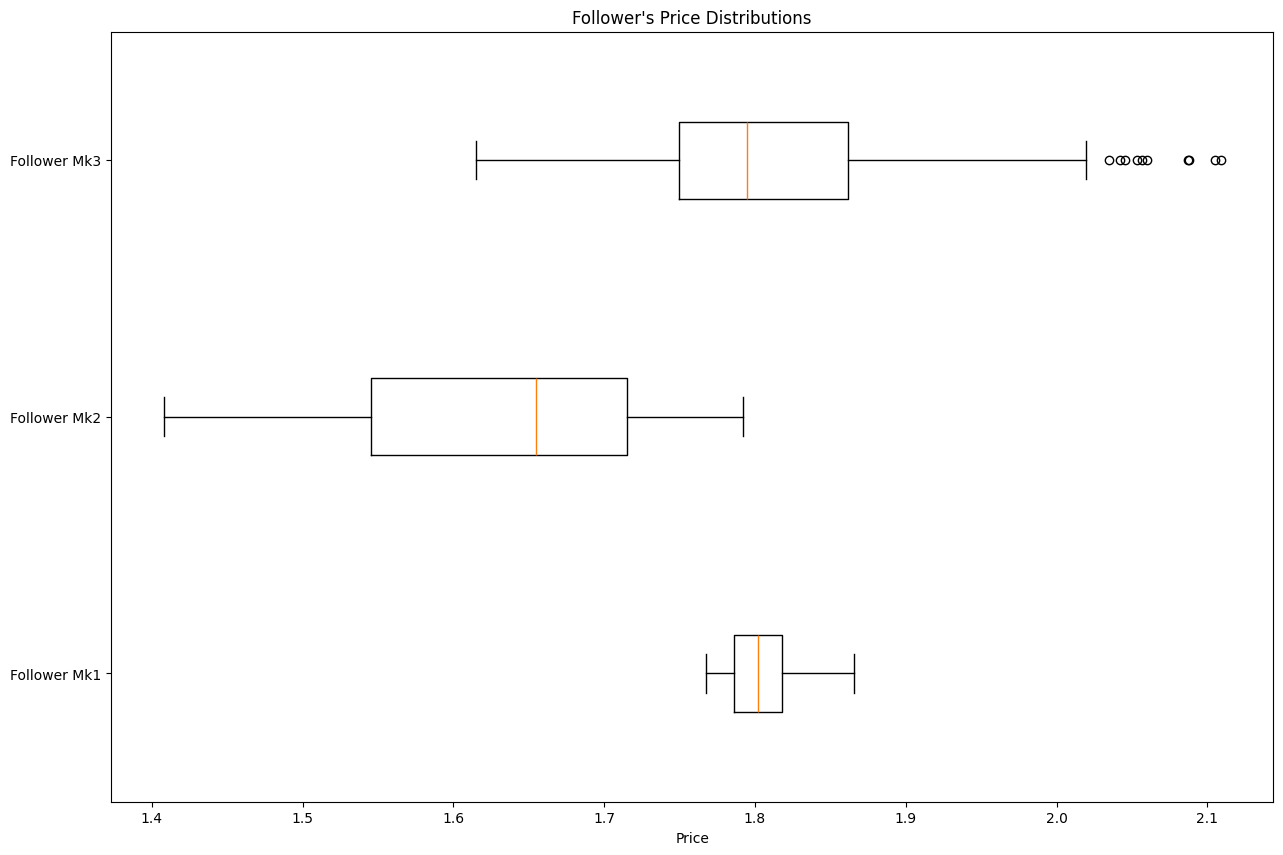

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

column = "Follower's Price"
data = [f1m[column], f2m[column], f3m[column]]

fig = plt.figure(figsize =(15, 10))
plt.boxplot(data, vert=0)

plt.title('Follower\'s Price Distributions')
plt.yticks([1, 2, 3], ['Follower Mk1', 'Follower Mk2', 'Follower Mk3'])
plt.xlabel('Price')

plt.show()
plt.savefig('follower_price_distributions.png')

## Profit Distributions

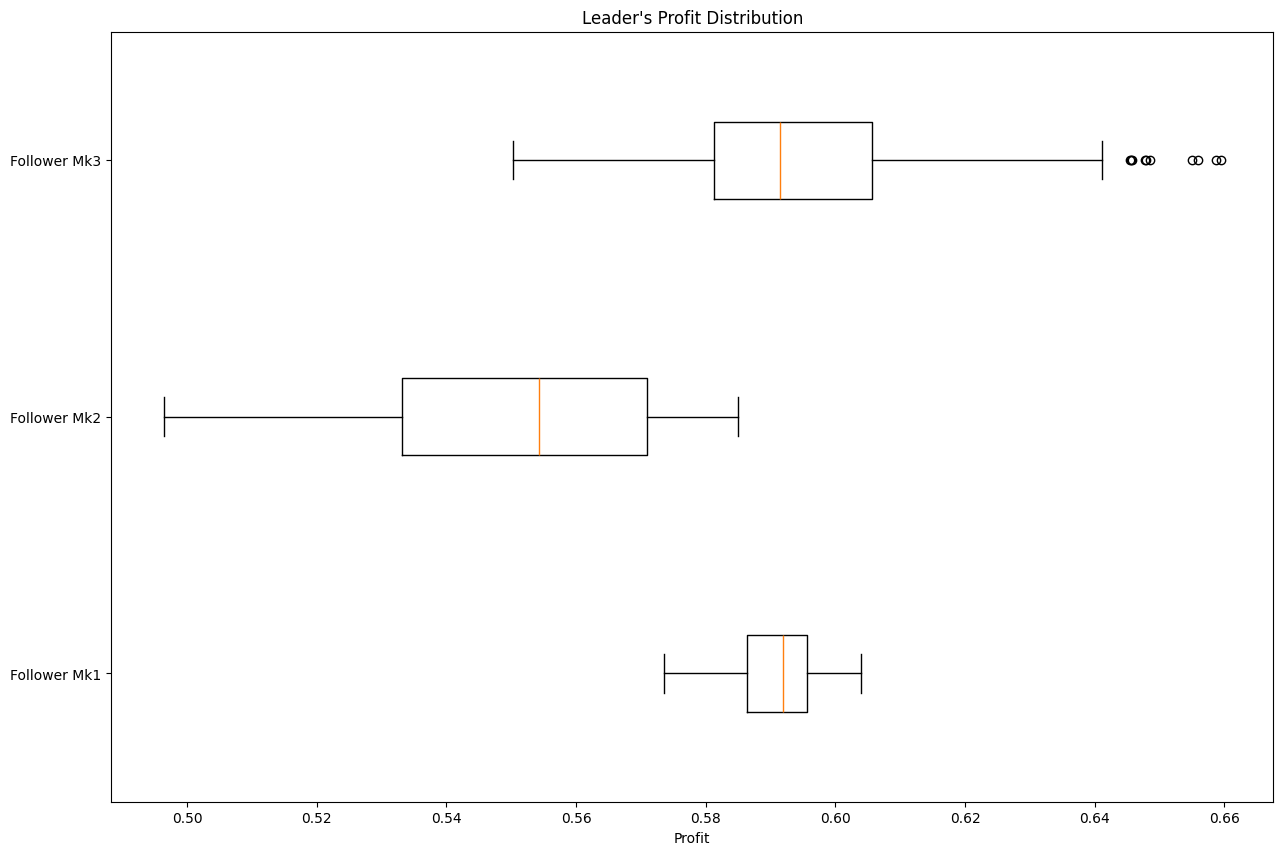

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

column = "Follower's Price"
follower_data = [f1m[column], f2m[column], f3m[column]]
columns = "Leader's Price"
leader_data = [f1m[columns], f2m[columns], f3m[columns]]

agent_profits = []
for i in range(3):
    leader_prices = leader_data[i]
    follower_prices = follower_data[i]
    profits = [daily_profit_L(leader_price, follower_price, 1) for leader_price, follower_price in zip(leader_prices, follower_prices)]
    agent_profits.append(profits)

fig = plt.figure(figsize =(15, 10))
plt.boxplot(agent_profits, vert=0)

plt.title('Leader\'s Profit Distribution')
plt.yticks([1, 2, 3], ['Follower Mk1', 'Follower Mk2', 'Follower Mk3'])
plt.xlabel('Profit')

plt.show()
plt.savefig('leader_profit_distribution_boxplot.png')

## (Assumed) Follower Profit vs Follower Price

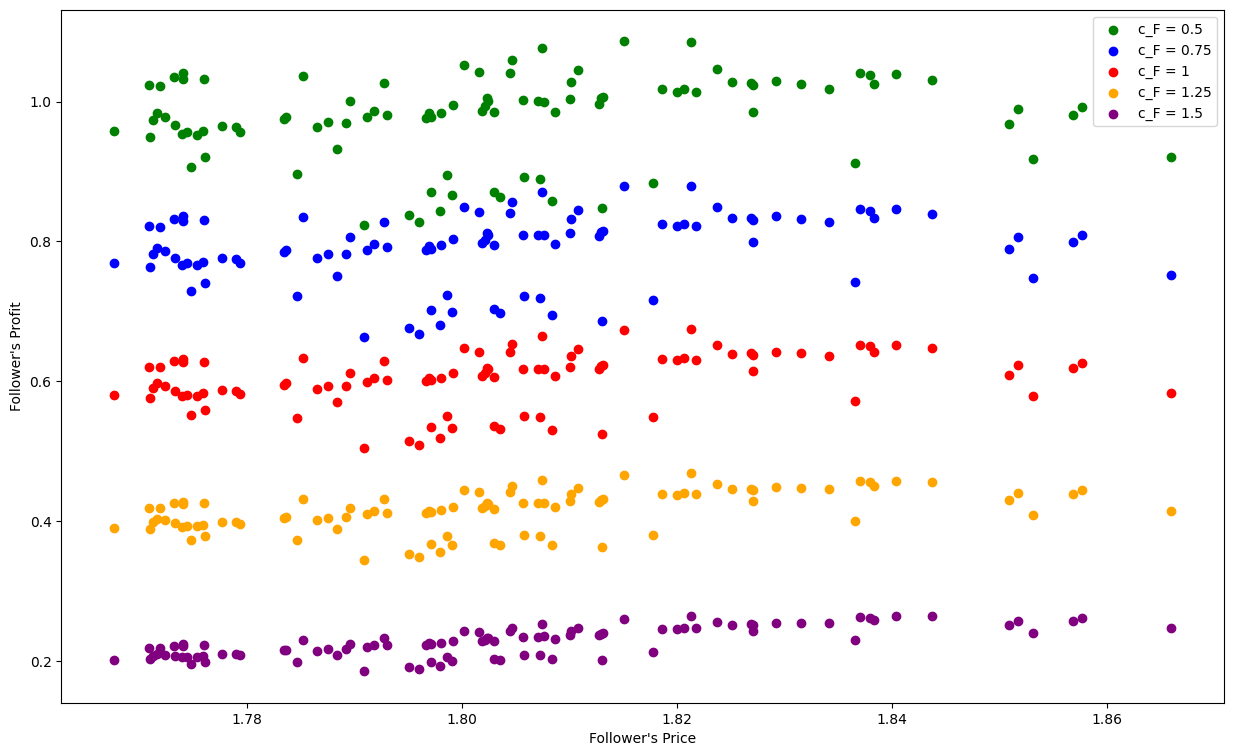

In [9]:
import numpy as np

plt.figure(figsize=(15, 9))

fm1_follower_prices = f1m["Follower's Price"]
fm1_leader_prices = f1m["Leader's Price"]
fm1_leader_profits = [daily_profit_L(leader_price, follower_price, 1) for leader_price, follower_price in zip(fm1_leader_prices, fm1_follower_prices)]

colors = ['green', 'blue', 'red', 'orange', 'purple']
costs = [0.5, 0.75, 1, 1.25, 1.5]
for c, color in zip(costs, colors):
    fm1_follower_profits = [daily_profit_F(leader_price, follower_price, c) for leader_price, follower_price in zip(fm1_leader_prices, fm1_follower_prices)] 
    plt.scatter(fm1_follower_prices, fm1_follower_profits, marker='o', color=color, label=f'c_F = {c}')

plt.xlabel("Follower's Price")
plt.ylabel("Follower's Profit")
plt.legend()
plt.savefig('follower_profit_vs_price.png')
plt.show()



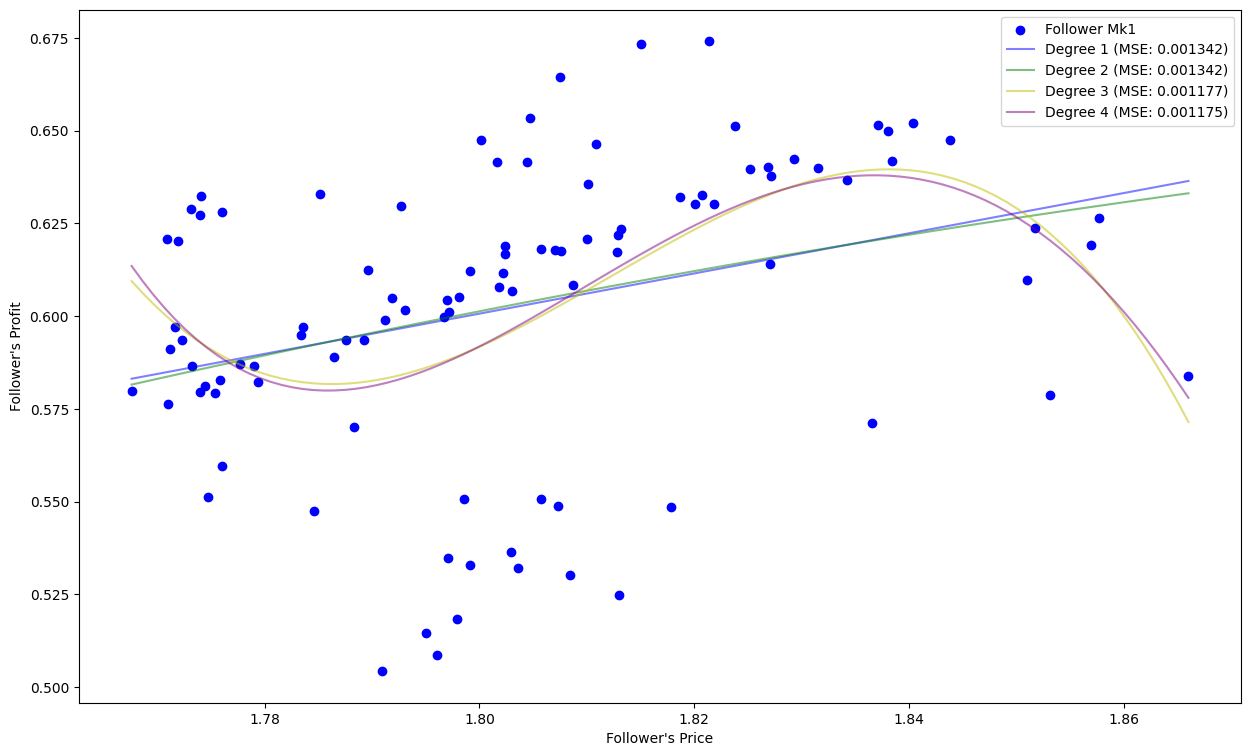

In [10]:
plt.figure(figsize=(15, 9))
fm1_follower_profits = [daily_profit_F(leader_price, follower_price, 1) for leader_price, follower_price in zip(fm1_leader_prices, fm1_follower_prices)] # assuming cost 1 for follower
plt.scatter(fm1_follower_prices, fm1_follower_profits, marker='o', color='blue', label='Follower Mk1')

degrees = [1, 2, 3, 4]
colours = ['b', 'g', 'y', 'purple']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(fm1_follower_prices, fm1_follower_profits, degree))
    y_fit = model(fm1_follower_prices)
    loss = np.mean((fm1_follower_profits - y_fit) ** 2) # Mean Squared Error
    x = np.linspace(min(fm1_follower_prices), max(fm1_follower_prices), 100)
    y_plot = model(x)
    plt.plot(x, y_plot, color=colour, label=f'Degree {degree} (MSE: {loss:.6f})', alpha=0.5)

plt.xlabel("Follower's Price")
plt.ylabel("Follower's Profit")
plt.legend()
plt.savefig('follower_profit_vs_price_cost_1.png')
plt.show()

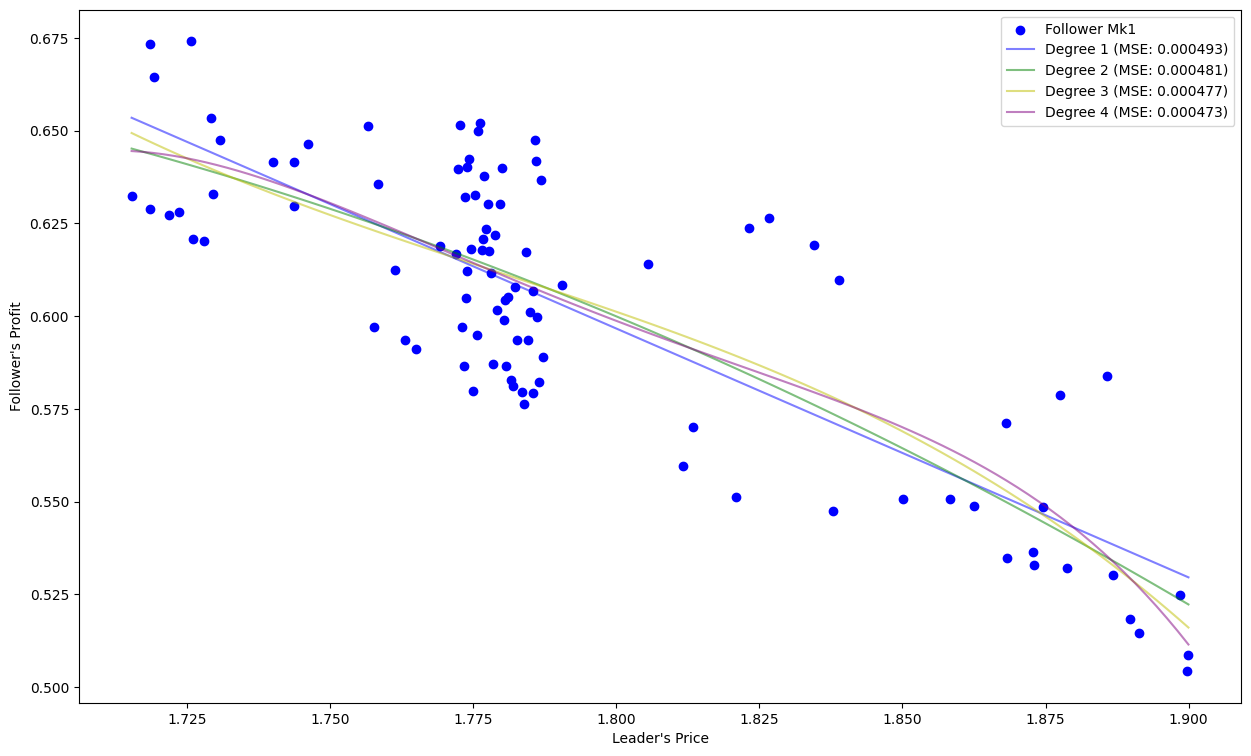

In [11]:
plt.figure(figsize=(15, 9))
fm1_follower_profits = [daily_profit_F(leader_price, follower_price, 1) for leader_price, follower_price in zip(fm1_leader_prices, fm1_follower_prices)] # assuming cost 1 for follower
plt.scatter(fm1_leader_prices, fm1_follower_profits, marker='o', color='blue', label='Follower Mk1')

degrees = [1, 2, 3, 4]
colours = ['b', 'g', 'y', 'purple']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(fm1_leader_prices, fm1_follower_profits, degree))
    y_fit = model(fm1_leader_prices)
    loss = np.mean((fm1_follower_profits - y_fit) ** 2) # Mean Squared Error
    x = np.linspace(min(fm1_leader_prices), max(fm1_leader_prices), 100)
    y_plot = model(x)
    plt.plot(x, y_plot, color=colour, label=f'Degree {degree} (MSE: {loss:.6f})', alpha=0.5)

plt.xlabel("Leader's Price")
plt.ylabel("Follower's Profit")
plt.legend()
plt.savefig('follower_profit_vs_leader_price_cost_1.png')
plt.show()

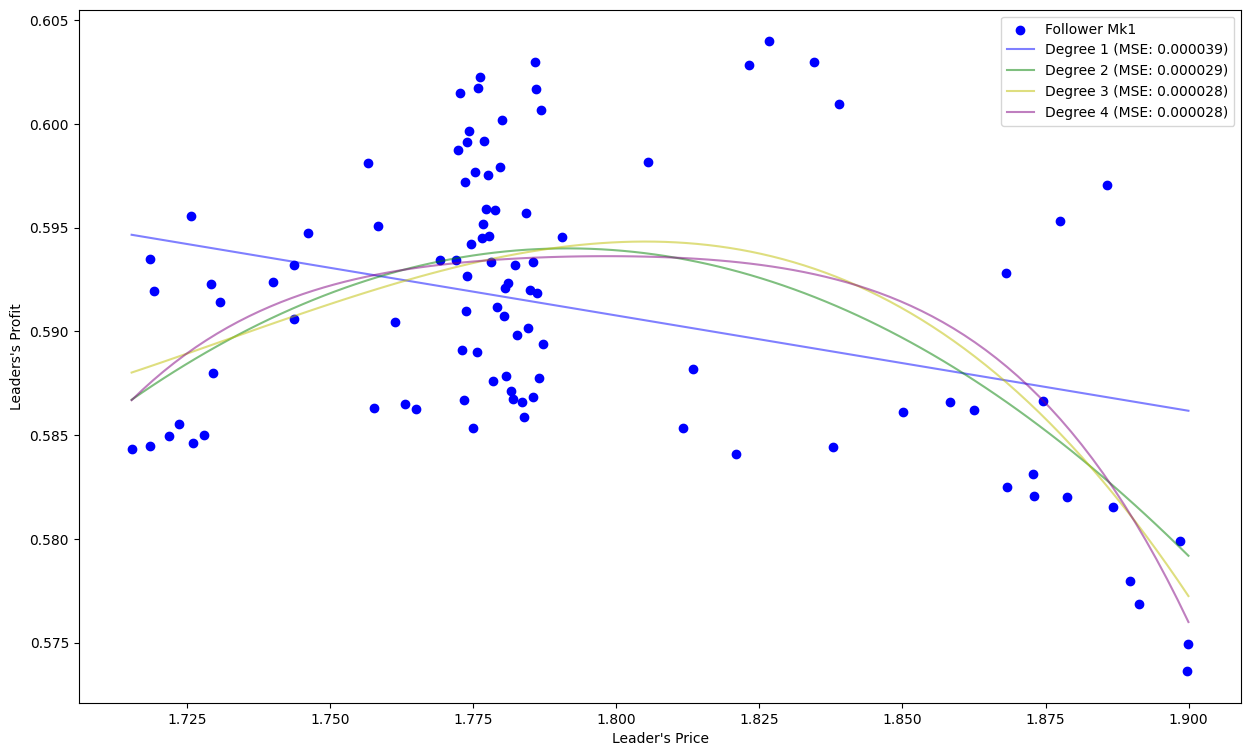

In [12]:
plt.figure(figsize=(15, 9))
fm1_leader_profits = [daily_profit_L(leader_price, follower_price, 1) for leader_price, follower_price in zip(fm1_leader_prices, fm1_follower_prices)] # assuming cost 1 for follower
plt.scatter(fm1_leader_prices, fm1_leader_profits, marker='o', color='blue', label='Follower Mk1')

degrees = [1, 2, 3, 4]
colours = ['b', 'g', 'y', 'purple']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(fm1_leader_prices, fm1_leader_profits, degree))
    y_fit = model(fm1_leader_prices)
    loss = np.mean((fm1_leader_profits - y_fit) ** 2) # Mean Squared Error
    x = np.linspace(min(fm1_leader_prices), max(fm1_leader_prices), 100)
    y_plot = model(x)
    plt.plot(x, y_plot, color=colour, label=f'Degree {degree} (MSE: {loss:.6f})', alpha=0.5)

plt.xlabel("Leader's Price")
plt.ylabel("Leaders's Profit")
plt.legend()
plt.savefig('leader_profit_vs_leader_price.png')
plt.show()

## 3D Follower Mk1 Profit vs Price vs Time

In [13]:
%pip install plotly
import plotly.express as px
f1m["Follower's Profit"] = pd.Series(fm1_follower_profits)

fig = px.scatter_3d(f1m, x="Date", y="Leader's Price", z="Follower's Price", width=600, height=500)
fig.update_traces(marker=dict(size=3), selector=dict(mode='markers'))
fig.show()

In [14]:
f1m.head()

,Date,Leader's Price,Follower's Price,Cost,Follower's Profit
0,1,1.721828,1.774033,1,0.627263
1,2,1.779242,1.793029,1,0.601645
2,3,1.787140,1.786484,1,0.588923
3,4,1.773467,1.773290,1,0.586556
4,5,1.746195,1.810835,1,0.646281


## Followers Against Leader's Price

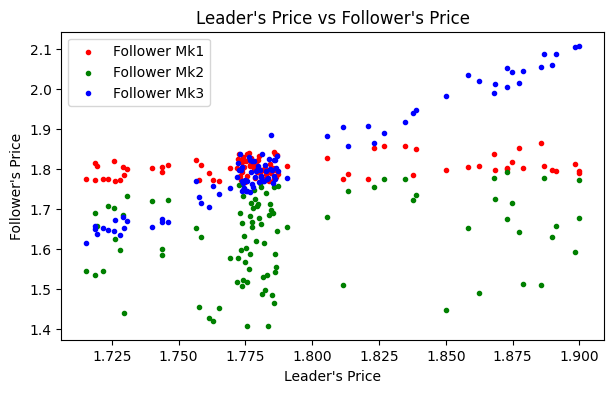

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

plt.scatter(f1m['Leader\'s Price'], f1m['Follower\'s Price'], marker='.', color='r', label='Follower Mk1')

plt.scatter(f2m['Leader\'s Price'], f2m['Follower\'s Price'], marker='.', color='g', label='Follower Mk2')

plt.scatter(f3m['Leader\'s Price'], f3m['Follower\'s Price'], marker='.', color='b', label='Follower Mk3')



plt.xlabel("Leader's Price")
plt.ylabel("Follower's Price")
plt.title("Leader's Price vs Follower's Price")
plt.legend()
plt.savefig('leader_vs_follower_price.png')
plt.show()

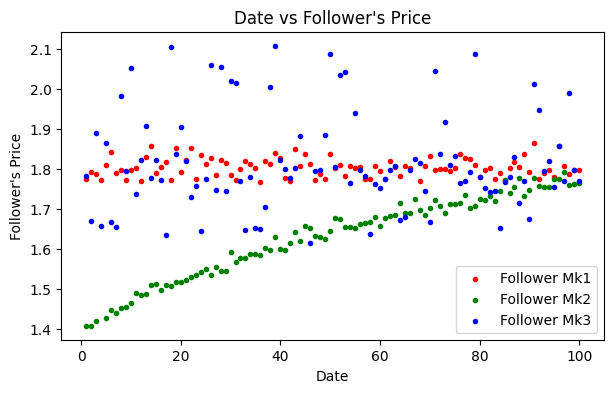

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

plt.scatter(f1m['Date'], f1m['Follower\'s Price'], marker='.', color='r', label='Follower Mk1')

plt.scatter(f2m['Date'], f2m['Follower\'s Price'], marker='.', color='g', label='Follower Mk2')

plt.scatter(f3m['Date'], f3m['Follower\'s Price'], marker='.', color='b', label='Follower Mk3')



plt.xlabel("Date")
plt.ylabel("Follower's Price")
plt.title("Date vs Follower's Price")
plt.legend()
plt.savefig('date_vs_follower_price.png')
plt.show()

## Follower's Price vs Leader's Price vs Time

In [17]:
%pip install plotly
import plotly.express as px

f1m['Follower Mk'] = 'Follower Mk1'
f2m['Follower Mk'] = 'Follower Mk2'
f3m['Follower Mk'] = 'Follower Mk3'

df = pd.concat([f1m, f2m, f3m])
df.head()

fig = px.scatter_3d(df, x="Leader's Price", y="Follower's Price", z="Date", color="Follower Mk", width=1000, height=800)
fig.show()


Note: you may need to restart the kernel to use updated packages.


## Follower Mk3 Price vs Leader's Price

<Figure size 640x480 with 0 Axes>

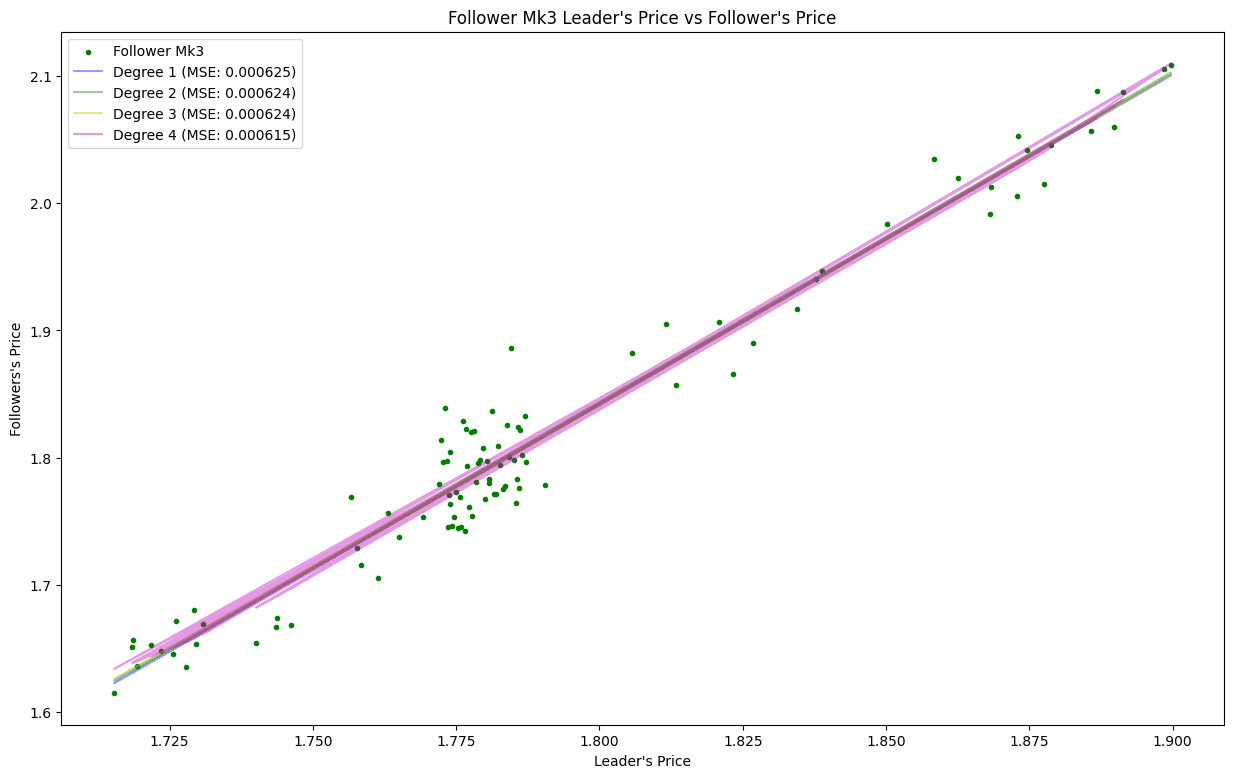

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

plt.clf()
plt.figure(figsize=(15, 9))

x = f3m['Leader\'s Price']
y = f3m['Follower\'s Price']
plt.scatter(x, y, marker='.', color='g', label='Follower Mk3')

degrees = [1, 2, 3, 4]
colours = ['b', 'g', 'y', 'm']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    y_fit = model(x)
    loss = np.mean((y - y_fit) ** 2) # Mean Squared Error
    plt.plot(x, y_fit, color=colour, label=f'Degree {degree} (MSE: {loss:.6f})', alpha=0.4)

plt.xlabel("Leader's Price")
plt.ylabel("Followers's Price")
plt.title("Follower Mk3 Leader's Price vs Follower's Price")
plt.legend()
plt.show()

# Follower Mk2 Price vs Time

<Figure size 640x480 with 0 Axes>

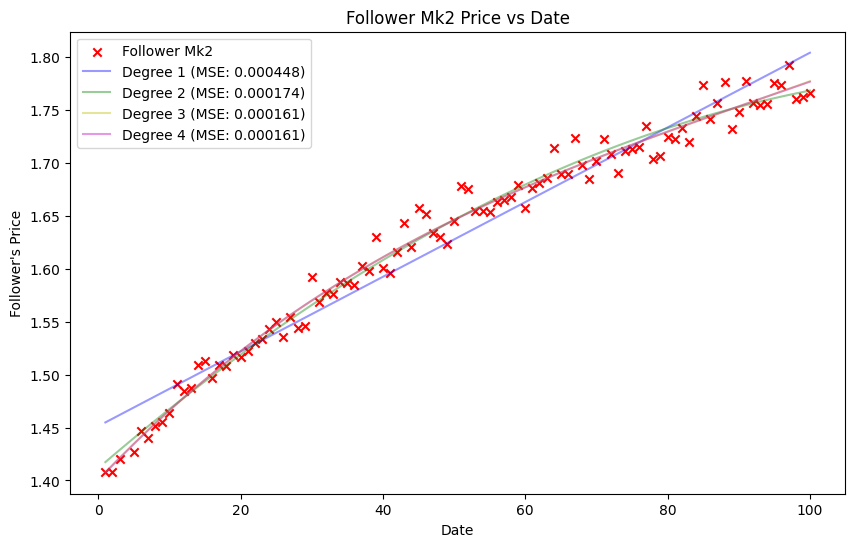

In [19]:
import numpy as np

plt.clf()
plt.figure(figsize=(10, 6))

x = f2m["Date"]
y = f2m["Follower's Price"]

plt.scatter(x, y, marker='x', color='r', label='Follower Mk2')

degrees = [1, 2, 3, 4]
colours = ['b', 'g', 'y', 'm']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    y_fit = model(x)
    loss = np.mean((y - y_fit) ** 2) # Mean Squared Error
    plt.plot(x, y_fit, color=colour, label=f'Degree {degree} (MSE: {loss:.6f})', alpha=0.4)

plt.xlabel("Date")
plt.ylabel("Follower's Price")
plt.title("Follower Mk2 Price vs Date")
plt.legend()
plt.savefig('./follower_mk2_price_vs_date.png')
plt.show()

## Followers vs Each Other

<Figure size 640x480 with 0 Axes>

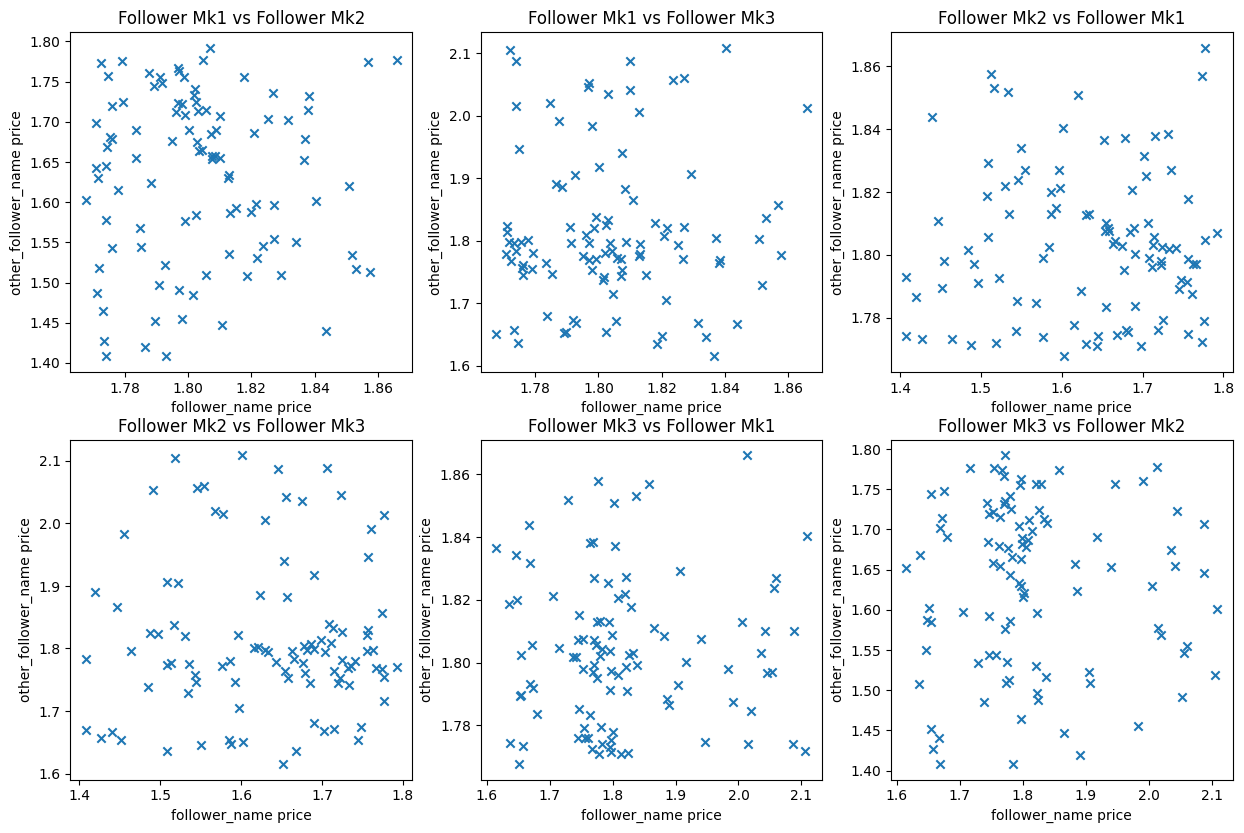

In [20]:
# plot each follower's price against the every other follower's price
plt.clf()
plt.figure(figsize=(15, 15))


followers = [f1m, f2m, f3m]
follower_names = ['Follower Mk1', 'Follower Mk2', 'Follower Mk3']

plot_no = 1
for i, (follower, follower_name) in enumerate(zip(followers, follower_names)):
    for j, (other_follower, other_follower_name) in enumerate(zip(followers, follower_names)):
        if follower_name == other_follower_name:
            continue

        x = follower["Follower's Price"]
        y = other_follower["Follower's Price"]

        plt.subplot(3, 3, plot_no)
        plt.scatter(x, y, marker='x', label=f'{follower_name} vs {other_follower_name}')
        plt.xlabel(f'follower_name price')
        plt.ylabel(f'other_follower_name price')
        plt.title(f'{follower_name} vs {other_follower_name}')
        
        plot_no += 1

plt.savefig('follower_price_comparisons.png')


In [21]:
# 3d scatter plot of mk1 follower price vs mk2 follower price vs mk3 follower price
import plotly.express as px
import pandas as pd
import numpy as np


# Create a new DataFrame with the follower prices
follower_prices = pd.DataFrame({
    'Follower Mk1': f1m["Follower's Price"],
    'Follower Mk2': f2m["Follower's Price"],
})
follower_prices['Date'] = range(1, len(follower_prices) + 1)
follower_prices = follower_prices.dropna()  # Drop rows with NaN values
follower_prices = follower_prices.reset_index(drop=True)

# Create a 3D scatter plot
fig = px.scatter_3d(follower_prices, x='Date', y='Follower Mk1', z='Follower Mk2',
                    title="3D Scatter Plot of Follower Prices",
                    labels={'Date': "Date", 'Follower Mk1': "Follower Mk1 Price", 'Follower Mk2': "Follower Mk2 Price"},
                    width=800, height=800)
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))

fig.show()

<Figure size 640x480 with 0 Axes>

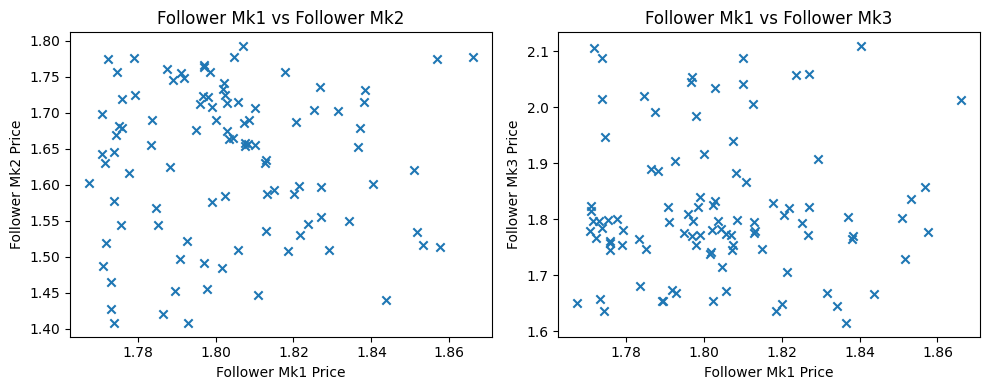

In [31]:
# plot each follower's price against the every other follower's price
plt.clf()
plt.figure(figsize=(10, 4))


followers = [f1m, f2m, f3m]
follower_pairs = [('Follower Mk1', 'Follower Mk2'), 
                  ('Follower Mk1', 'Follower Mk3')]

plt.subplot(1, 2, 1)
plt.scatter(f1m["Follower's Price"], f2m["Follower's Price"], marker='x', label='Follower Mk1 vs Follower Mk2')
plt.xlabel("Follower Mk1 Price")
plt.ylabel("Follower Mk2 Price")
plt.title("Follower Mk1 vs Follower Mk2")

plt.subplot(1, 2, 2)
plt.scatter(f1m["Follower's Price"], f3m["Follower's Price"], marker='x', label='Follower Mk1 vs Follower Mk3')
plt.xlabel("Follower Mk1 Price")
plt.ylabel("Follower Mk3 Price")
plt.title("Follower Mk1 vs Follower Mk3")

plt.tight_layout()

plt.savefig('follower_price_comparisons.png')
plt.show()


## Follower Mk1 Price Analysis

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\3952562296.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\3952562296.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\3952562296.py:12: RankWarning:

Polyfit may be poorly conditioned



<Figure size 640x480 with 0 Axes>

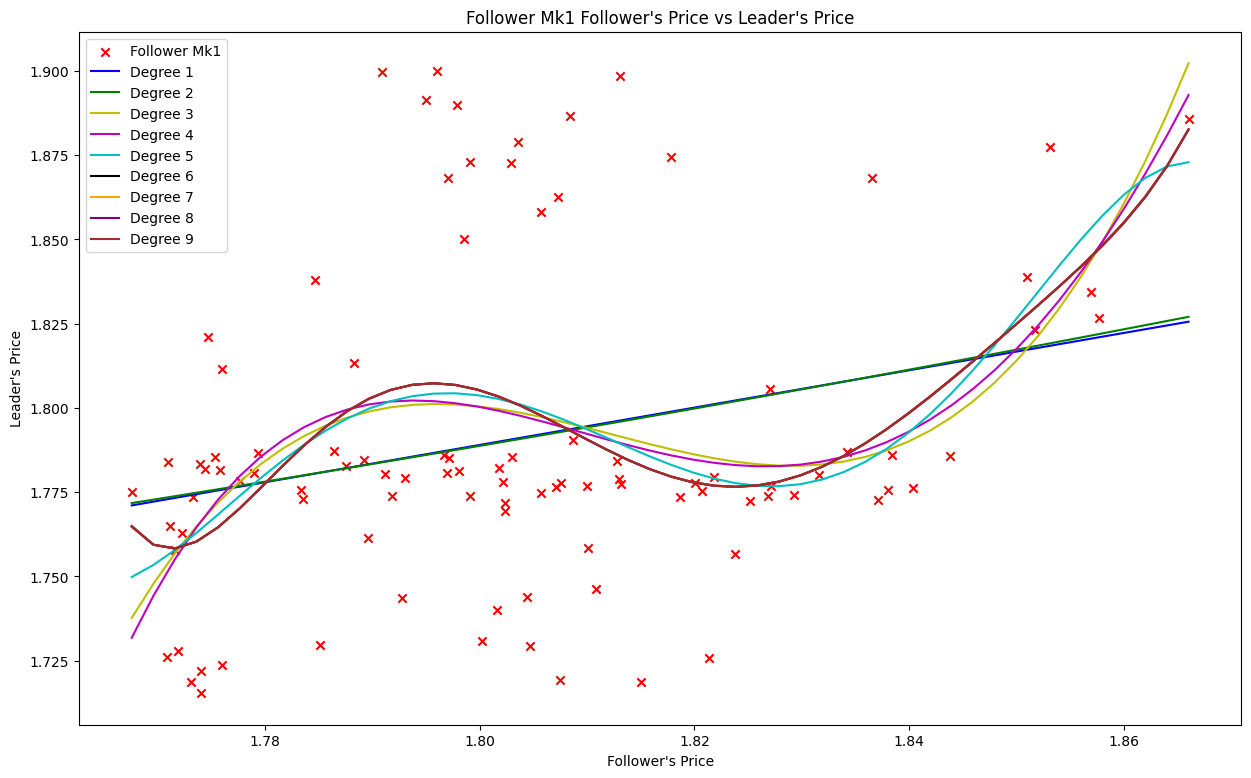

In [22]:
plt.clf()
plt.figure(figsize=(15, 9))

x = f1m["Follower's Price"]
y = f1m["Leader's Price"]

plt.scatter(x, y, marker='x', color='r', label='Follower Mk1')

degrees = range(1, 10)
colours = ['b', 'g', 'y', 'm', 'c', 'k', 'orange', 'purple', 'brown']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    x_fit = np.linspace(x.min(), x.max(), num=50)
    y_fit = model(x_fit)
    plt.plot(x_fit, y_fit, color=colour, label=f'Degree {degree}')

plt.xlabel("Follower's Price")
plt.ylabel("Leader's Price")
plt.title("Follower Mk1 Follower's Price vs Leader's Price")
plt.legend()

plt.show()

<Figure size 640x480 with 0 Axes>

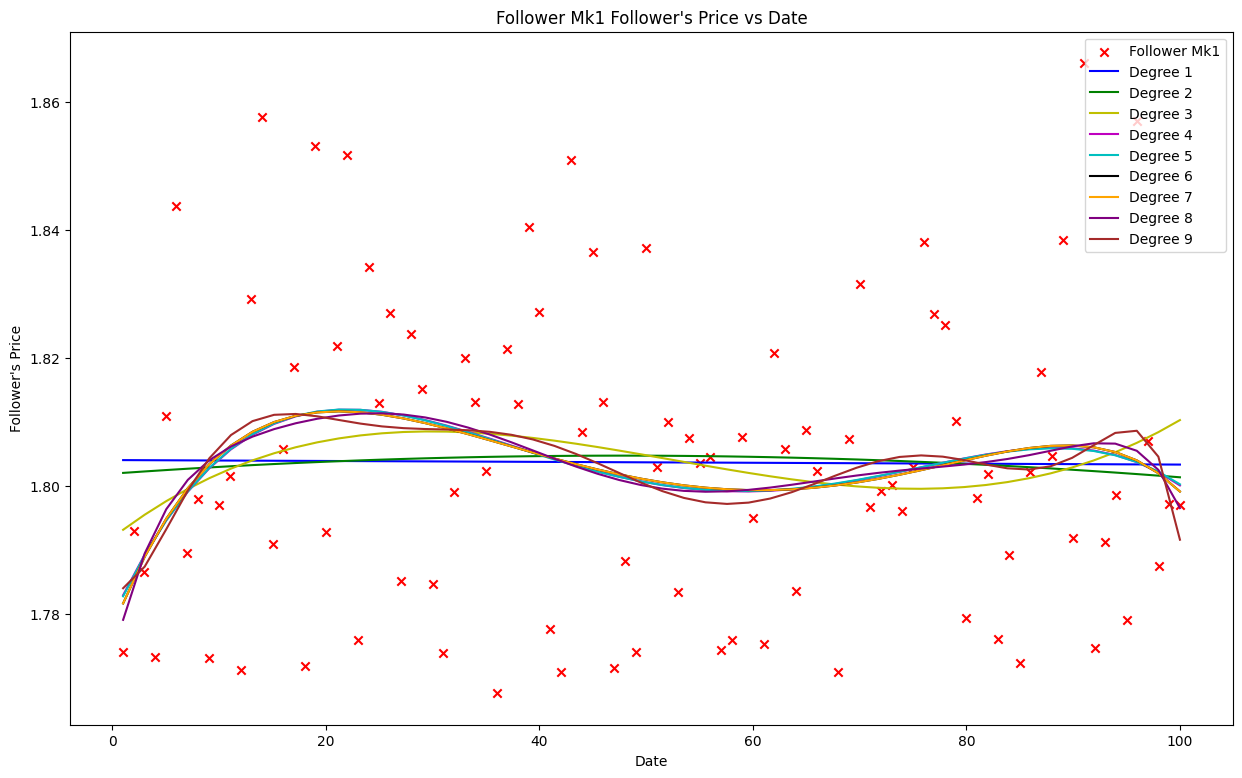

In [23]:
plt.clf()
plt.figure(figsize=(15, 9))

x = f1m["Date"]
y = f1m["Follower's Price"]

plt.scatter(x, y, marker='x', color='r', label='Follower Mk1')

degrees = range(1, 10)
colours = ['b', 'g', 'y', 'm', 'c', 'k', 'orange', 'purple', 'brown']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    x_fit = np.linspace(x.min(), x.max(), num=50)
    y_fit = model(x_fit)
    plt.plot(x_fit, y_fit, color=colour, label=f'Degree {degree}')

plt.xlabel("Date")
plt.ylabel("Follower's Price")
plt.title("Follower Mk1 Follower's Price vs Date")
plt.legend()

plt.show()

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21872\801496475.py:12: RankW

<Figure size 640x480 with 0 Axes>

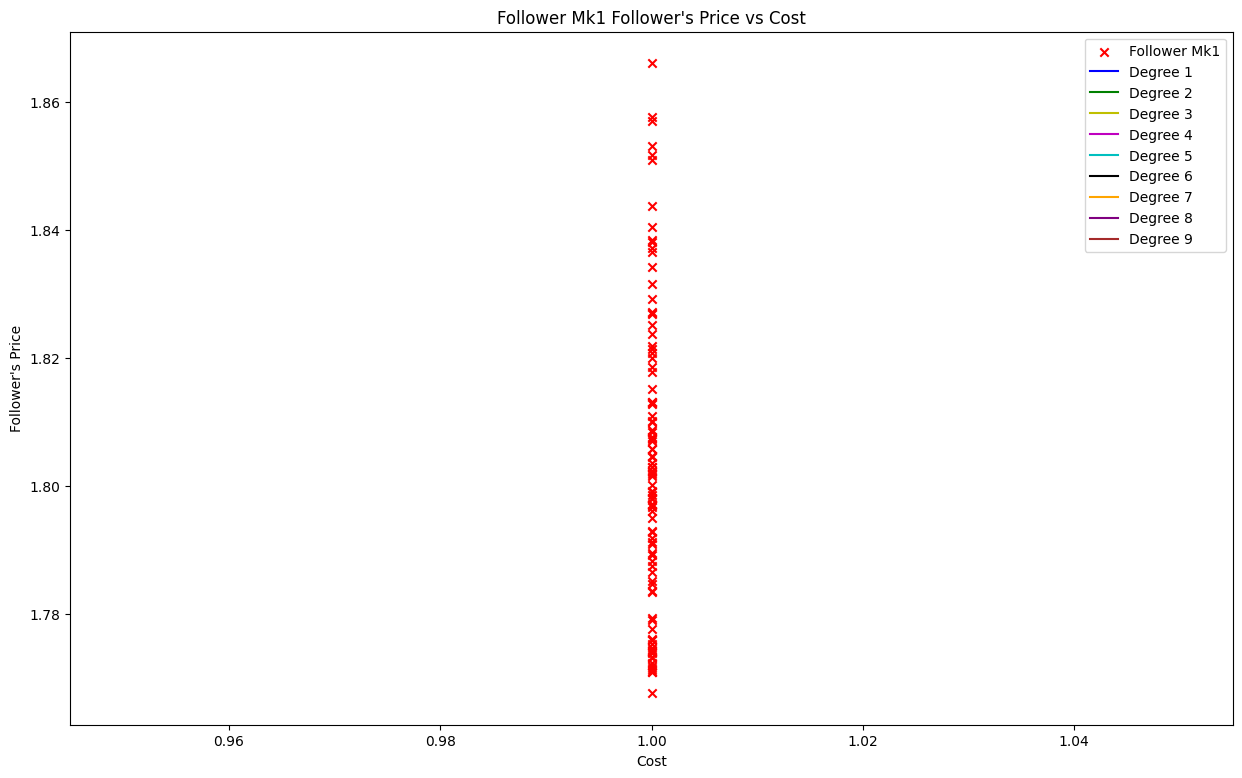

In [24]:
plt.clf()
plt.figure(figsize=(15, 9))

x = f1m["Cost"]
y = f1m["Follower's Price"]

plt.scatter(x, y, marker='x', color='r', label='Follower Mk1')

degrees = range(1, 10)
colours = ['b', 'g', 'y', 'm', 'c', 'k', 'orange', 'purple', 'brown']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    x_fit = np.linspace(x.min(), x.max(), num=50)
    y_fit = model(x_fit)
    plt.plot(x_fit, y_fit, color=colour, label=f'Degree {degree}')

plt.xlabel("Cost")
plt.ylabel("Follower's Price")
plt.title("Follower Mk1 Follower's Price vs Cost")
plt.legend()

plt.show()

# Leader Price Change vs Follower Price Change

<Figure size 640x480 with 0 Axes>

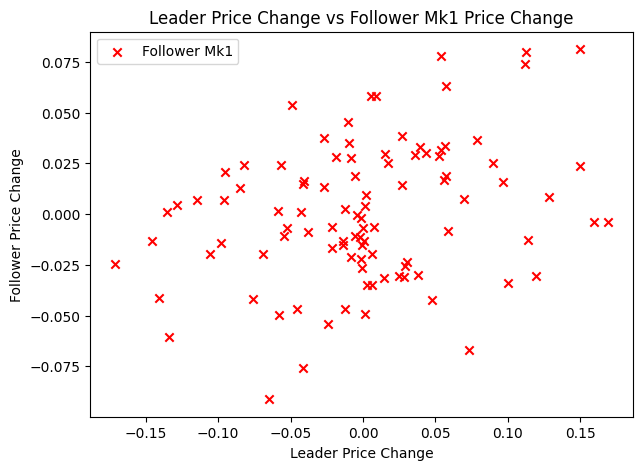

In [25]:
# plot the change in leaders price compared to previous day against the change in followers price compared to previous day
f1m['Leader Price Change'] = f1m["Leader's Price"].diff()
f1m['Follower Price Change'] = f1m["Follower's Price"].diff()

plt.clf()
plt.figure(figsize=(7, 5))
plt.scatter(f1m['Leader Price Change'], f1m['Follower Price Change'], marker='x', color='r', label='Follower Mk1')
plt.xlabel("Leader Price Change")
plt.ylabel("Follower Price Change")
plt.title("Leader Price Change vs Follower Mk1 Price Change")
plt.legend()
plt.savefig('mk1_leader_price_change_vs_follower_price_change.png')

# Leader Price Change vs Follower Price

99
98


<Figure size 640x480 with 0 Axes>

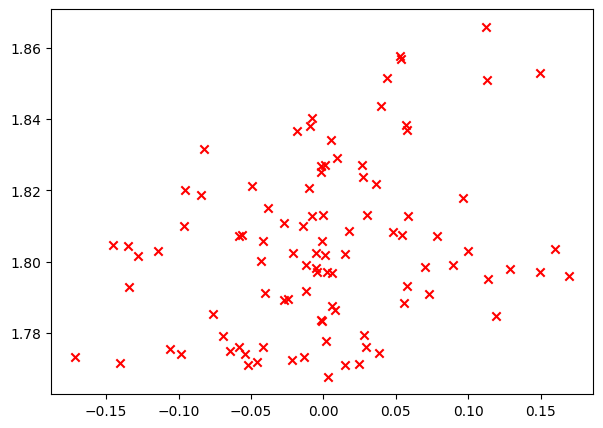

In [26]:
# plot the change in leaders price compared to previous day against the change in followers price compared to previous day
f1m['Leader Price Change'] = f1m["Leader's Price"].diff()

plt.clf()
plt.figure(figsize=(7, 5))
print(len(f1m['Leader Price Change']))
print(len(f1m["Follower's Price"][1:]))
plt.scatter(f1m['Leader Price Change'], f1m["Follower's Price"], marker='x', color='r', label='Follower Mk1')